Goal :

    To classify the flowers dataset initially using simple CNN.
    Later classify using Data Augmentation techniques and check score and matrix.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import cv2
# import os
# import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" # Url of dataset
data_dir= tf.keras.utils.get_file('flower_photos', origin= dataset_url,cache_dir = '.', untar = True) # Downloading dataset and saving it to system.Assigning variable.

In [4]:
data_dir # Checking the directory

'.\\datasets\\flower_photos'

In [5]:
import pathlib

In [6]:
data_dir = pathlib.Path(data_dir) # Numpy array from datasets path.

In [7]:
data_dir

WindowsPath('datasets/flower_photos')

In [8]:
data_dir.glob('*/*.jpg')

<generator object Path.glob at 0x00000010FBA9B900>

In [9]:
list(data_dir.glob('*/*.jpg')) # */* acccessing all files with jpg format from the directory.

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [10]:
images_count = len(list(data_dir.glob('*/*.jpg')))
images_count

3670

In [11]:
roses = (list(data_dir.glob('roses/*.jpg')))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [12]:
len(roses)

641

In [13]:
import PIL

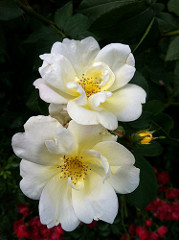

In [14]:
# PIL.Image.open(str(roses[1]))
PIL.Image.open(roses[0])

In [15]:
tulips = (list(data_dir.glob('tulips/*.jpg')))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

In [16]:
len(tulips)

799

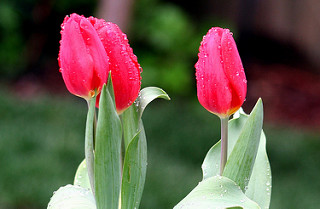

In [17]:
PIL.Image.open(tulips[0])

In [18]:
import cv2

In [19]:
# Creating hardcoded dictionary for loaction and file path of each flower type.
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*.jpg')),
    'daisy':list(data_dir.glob('daisy/*.jpg')),
    'dandelion':list(data_dir.glob('dandelion/*.jpg')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg')),
    'tulips':list(data_dir.glob('tulips/*.jpg')),
              }
            

In [20]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [21]:
# Creating hardcoded dictionary for loaction and file path of each flower type.
flowers_labels_dict = {
    'roses': 0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
              }

In [22]:
flowers_images_dict['roses'][0] # Path is accessed but windowspath string showing which will not be accepted in open cv.

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [23]:
str(flowers_images_dict['roses'][0]) # WindowsPath string removed by suing str arguement.

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [24]:
# img = cv2.imread(flowers_images_dict['roses'][0])  # This will throw an error as imread expects path only.
img = cv2.imread(str(flowers_images_dict['roses'][0])) # Converting roses 0th image to numpy array using opencv.

In [25]:
img.shape # 240x179 pixel image created with 3 rgb color grades.

(240, 179, 3)

In [26]:
cv2.resize(img,(180,180)).shape # resizing image using opencv. 

(180, 180, 3)

In [27]:
flowers_images_dict.items() #prints the dictionary in the form of comma separated tuples to be used for loops(key,values)

dict_items([('roses', [WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'), WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'), WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'), WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'), WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'), WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'), WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'), WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'), WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'), WindowsPath('datasets/flowe

In [28]:
len(flowers_images_dict.items()) # Only 5 flowers -> ((key,values),(key,values),(key,values),(key,values),(key,values))

5

In [29]:
for i, j in flowers_images_dict.items(): # Checking for loops.(J contains paths so avoid printing)
    print (i)

roses
daisy
dandelion
sunflowers
tulips


In [30]:
X,y = [],[]

In [31]:
for i, j in flowers_images_dict.items(): # Checking for loops.(J contains paths so avoid printing)
    print (i)
#     print (j)  # j will print all the image paths 
    print (len(j))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [32]:
for flower_name, image_paths in flowers_images_dict.items():
    for i in image_paths:
        img = cv2.imread(str(i))
        resized_image = cv2.resize(img,(180,180))
        X.append(resized_image)
        y.append(flowers_labels_dict[flower_name])

In [33]:
X

[array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], dtype=uint8),
 array([[[13, 18, 17],
         [11, 13, 1

In [34]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [35]:
type(X) # X is list but X[0] is numpy array. Refer below

list

In [36]:
len(X) #Total samples.

3670

In [37]:
type(X[0]) # Numpy array.

numpy.ndarray

In [38]:
# X.shape # Throws an error (list has no shape)
X[0].shape # Shape of 0th sample

(180, 180, 3)

In [39]:
X= np.array(X) # X was a list above. Converting to numpy
y= np.array(y) # y was num

In [40]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0) # Default ratio at 0.25 

In [42]:
len(X_train) 

2752

In [43]:
len(X_test) 

918

In [44]:
X_train.max()

255

In [45]:
X_train.min()

0

In [46]:
X_train_scaled = X_train/X_train.max()
X_test_scaled = X_test/X_test.max()

In [47]:
X_train_scaled.max()

1.0

In [48]:
len(flowers_images_dict)

5

In [49]:
from keras.models import load_model
# from tensorflow import keras
# model_cnn.save('model_cnn.h5')
# cnn_model = keras.models.load_model('cnn_model.h5')
model_cnn = load_model('model_cnn.h5')

In [50]:
model_cnn.evaluate(X_test_scaled, y_test)
# Train accuracy = 0.9771
# Test accuracy = 0.6601
# Model is overfitted. Approach needs to be changed. Trying data Augmentation and check for results.

29/29 [==============================] - 18s 343ms/step - loss: 1.9177 - accuracy: 0.6601


[1.9176605939865112, 0.6601307392120361]

In [51]:
predictions = model_cnn.predict(X_test_scaled)

29/29 [==============================] - 11s 355ms/step


In [52]:
predictions

array([[  0.7641262 ,  23.781504  ,   5.2504883 , -20.082172  ,
         -6.11492   ],
       [  9.701224  ,   0.5516871 ,  -7.451721  ,  -1.6748242 ,
          2.5837355 ],
       [  0.62687755,   2.4325578 ,   8.484468  ,  -8.732682  ,
         -1.3363154 ],
       ...,
       [ -4.149145  ,  -1.081694  ,  -5.9042196 ,   7.059701  ,
          1.0183045 ],
       [  3.6625423 ,   2.8594244 ,   3.1886015 ,   2.088791  ,
         -5.4442344 ],
       [ -0.9717978 ,  -7.5625987 ,  -0.14538693,   3.6840622 ,
          3.0483468 ]], dtype=float32)

In [53]:
type(predictions)

numpy.ndarray

In [54]:
len (predictions) # same as X_test

918

__Predicting using linear values of predictions. Later with softmax.__

In [55]:
predictions[0]

array([  0.7641262,  23.781504 ,   5.2504883, -20.082172 ,  -6.11492  ],
      dtype=float32)

In [56]:
np.argmax(predictions[0])

1

In [57]:
y_test[0]

1

In [58]:
y_pred_classes = [np.argmax(i) for i in predictions ]

In [59]:
y_pred_classes[:20]

[1, 0, 2, 4, 3, 3, 4, 1, 3, 4, 1, 3, 2, 3, 1, 1, 1, 2, 0, 1]

In [60]:
y_test[:20]

array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4, 1, 3, 2, 3, 4, 2, 1, 1, 0, 2])

__Using softmax and predicting values, Comparing it if we get same results for linear and softmax__

In [61]:
score_0= tf.nn.softmax(predictions[0])

In [62]:
score_0

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.0085091e-10, 1.0000000e+00, 8.9553440e-09, 8.9175738e-20,
       1.0378828e-13], dtype=float32)>

In [63]:
all_score= tf.nn.softmax(predictions)

In [64]:
all_score.shape

TensorShape([918, 5])

In [65]:
y_pred_classes_softmax = [np.argmax(i) for i in all_score ]

In [66]:
y_pred_classes_softmax[:20]

[1, 0, 2, 4, 3, 3, 4, 1, 3, 4, 1, 3, 2, 3, 1, 1, 1, 2, 0, 1]

In [67]:
y_pred_classes[:20]

[1, 0, 2, 4, 3, 3, 4, 1, 3, 4, 1, 3, 2, 3, 1, 1, 1, 2, 0, 1]

In [68]:
# We see the predictions are same for softmax and linear scale. After all we are taking the max value out of 5 classes.
# So after using softmax the max values of linear scale would still be max only in probabilistic range.

In [69]:
# Report for y_pred_classes_softmax
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(y_test,y_pred_classes_softmax))

              precision    recall  f1-score   support

           0       0.71      0.54      0.61       176
           1       0.59      0.69      0.64       154
           2       0.70      0.72      0.71       226
           3       0.62      0.75      0.68       150
           4       0.68      0.61      0.64       212

    accuracy                           0.66       918
   macro avg       0.66      0.66      0.66       918
weighted avg       0.67      0.66      0.66       918



In [70]:
# Report for y_pred_classes
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.71      0.54      0.61       176
           1       0.59      0.69      0.64       154
           2       0.70      0.72      0.71       226
           3       0.62      0.75      0.68       150
           4       0.68      0.61      0.64       212

    accuracy                           0.66       918
   macro avg       0.66      0.66      0.66       918
weighted avg       0.67      0.66      0.66       918



Text(69.0, 0.5, 'True')

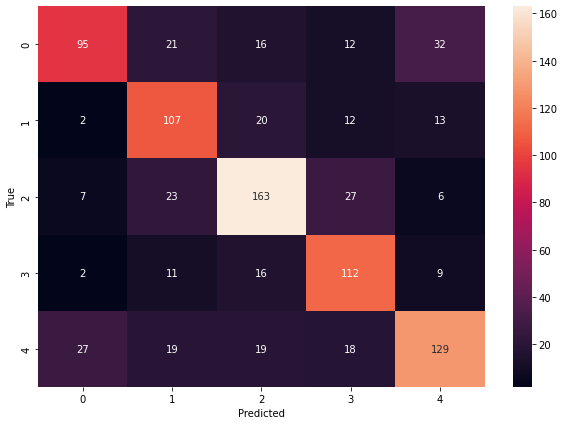

In [71]:
cm= tf.math.confusion_matrix(y_test,y_pred_classes)
import seaborn as sn
plt.figure (figsize =(10,7))
sn.heatmap(cm, annot = True,fmt = "d" )
plt.xlabel("Predicted")
plt.ylabel("True")

## __Using data Augmentation techniques__

__Using Random Zoom__

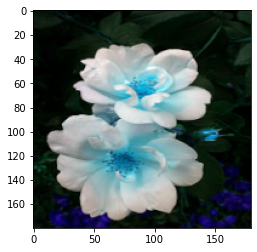

In [72]:
plt.imshow(X[0])

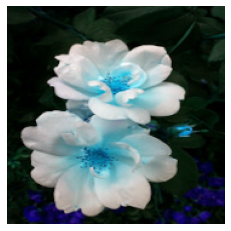

In [73]:
plt.axis('off') # to turn off the axis 
plt.imshow(X[0])

In [74]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9) # Multiplies the array with some random factor. 
])

In [75]:
data_augmentation(X[0]).shape # Initially 1d was not accepted. Now this works fast and fine.(x)[0] was used before update.

TensorShape([180, 180, 3])

In [76]:
type(data_augmentation(X[0]))

tensorflow.python.framework.ops.EagerTensor

In [77]:
X[0].shape

(180, 180, 3)

In [78]:
# data_augmentation(X)[0] 
# Each time the array will be changed. 
# data_augmentation(X)[0] takes more time.
# data_augmentation(X[0]) takes less time.

In [79]:
data_augmentation(X[0]) # Loads immediately. Each time the array will be changed as random while creating func above.

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[210.36029 , 211.82605 , 211.82605 ],
        [211.33377 , 212.88564 , 212.71555 ],
        [212.38583 , 213.85991 , 213.3132  ],
        ...,
        [204.6716  , 221.48564 , 224.27913 ],
        [205.34705 , 221.03127 , 223.82475 ],
        [205.97984 , 220.20648 , 223.04262 ]],

       [[207.97684 , 210.2455  , 210.11053 ],
        [208.8299  , 211.34021 , 211.02895 ],
        [209.95973 , 212.47002 , 211.84622 ],
        ...,
        [201.54582 , 219.449   , 222.6191  ],
        [202.29904 , 219.00835 , 222.17844 ],
        [203.12253 , 218.33028 , 221.43011 ]],

       [[206.62595 , 209.94666 , 209.51285 ],
        [207.32346 , 210.9636  , 210.33978 ],
        [208.4533  , 212.09341 , 211.29889 ],
        ...,
        [198.53294 , 217.01863 , 220.56534 ],
        [199.28616 , 216.43613 , 219.98285 ],
        [200.2652  , 216.00511 , 219.32602 ]],

       ...,

       [[ 74.37611 , 154.86073 , 170.95563 ],
        [ 72.

In [80]:
data_augmentation(X[0]) # Observe the zoomed data array is changed again.

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[220.11377 , 218.32301 , 217.63982 ],
        [221.91913 , 219.08366 , 218.68518 ],
        [222.71753 , 218.41235 , 218.45699 ],
        ...,
        [231.8591  , 225.21652 , 225.33182 ],
        [232.99982 , 224.79535 , 224.84045 ],
        [233.55707 , 224.53262 , 224.53262 ]],

       [[226.42685 , 222.28802 , 221.00333 ],
        [226.52988 , 221.78012 , 220.78012 ],
        [225.13904 , 219.43842 , 218.88153 ],
        ...,
        [229.13896 , 223.00708 , 222.72238 ],
        [230.28064 , 223.00708 , 222.72238 ],
        [231.05927 , 223.0753  , 222.7455  ]],

       [[229.06357 , 223.15228 , 221.42447 ],
        [228.24081 , 222.09708 , 220.65398 ],
        [226.06458 , 219.55902 , 218.55904 ],
        ...,
        [224.54791 , 219.9053  , 219.17749 ],
        [224.70786 , 219.9053  , 219.17749 ],
        [224.9259  , 219.83313 , 218.99002 ]],

       ...,

       [[111.999115, 177.72934 , 184.11276 ],
        [108.

In [81]:
type(data_augmentation(X[0]))

tensorflow.python.framework.ops.EagerTensor

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


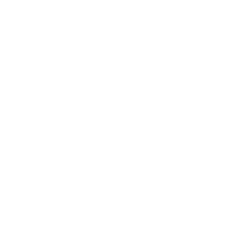

In [82]:
plt.axis('off') 
plt.imshow(data_augmentation(X[0]))

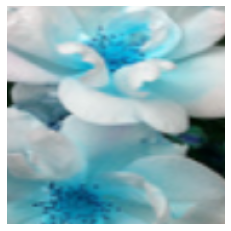

In [83]:
plt.axis('off') 
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 
# type(data_augmentation(X[0])) is tensorflow format. Converting to numpy and int8 to remove any decimals.
# If decimals are not removed then the image would look like the one in the above cell.
# Each time the cell is run: new zoomed image will generate. refer next cell.

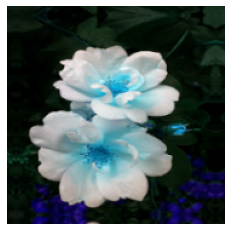

In [84]:
# observve the new image generated as the array is changed each time.
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

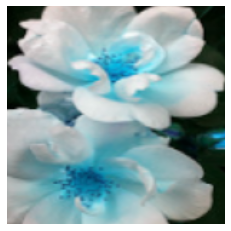

In [85]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

__Using Random Contrast__

In [86]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9) # Multiplies the array with some random factor. 
])

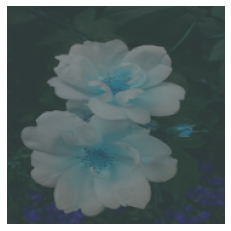

In [87]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

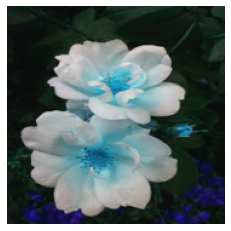

In [88]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

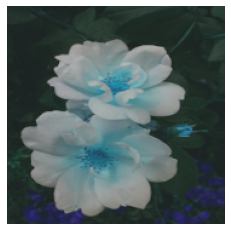

In [89]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

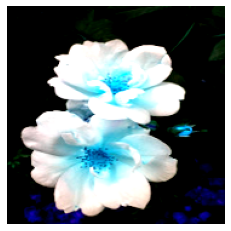

In [90]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

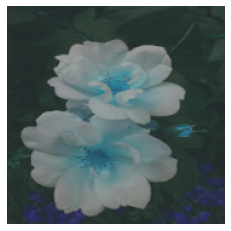

In [91]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

__Using Random Rotation__

In [92]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.3) # Multiplies the array with some random factor. 
])

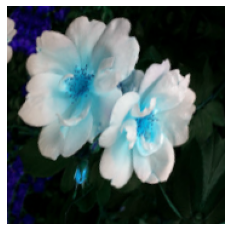

In [93]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

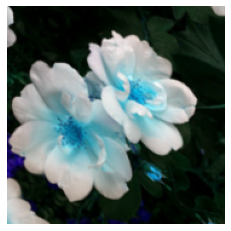

In [94]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

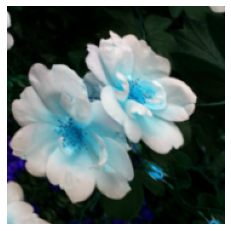

In [95]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

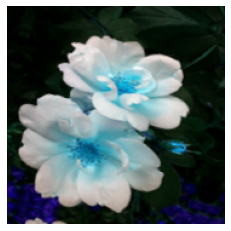

In [96]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

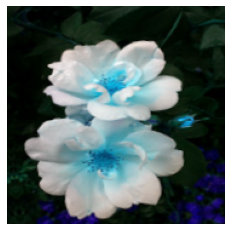

In [97]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

__Using Flips(Mirror Images)- Horizontal and Vertical__

In [98]:
# Just a simple horizontal flip 
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
])

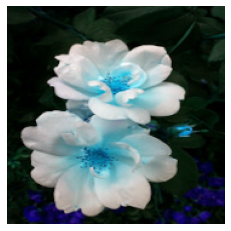

In [99]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

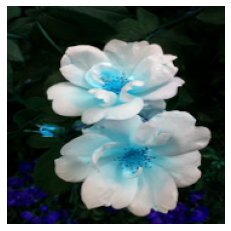

In [100]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

In [101]:
# Just a simple vertical flip 
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("vertical"),
])

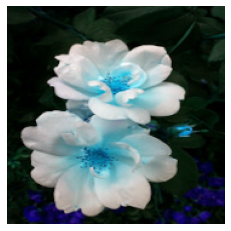

In [102]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

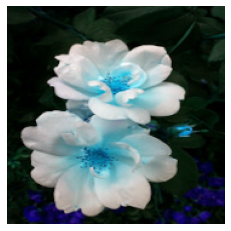

In [103]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8")) 

__Using data augmentation on whole dataset__

In [104]:
from keras.models import load_model
# from tensorflow import keras
# model_augmented_cnn.save('model_augmented_cnn.h5')
model_augmented_cnn = load_model('model_augmented_cnn.h5')

In [105]:
model_augmented_cnn.evaluate(X_test_scaled, y_test)
# Train accuracy = 0.9517
# Test accuracy =  0.7200

29/29 [==============================] - 11s 380ms/step - loss: 1.3363 - accuracy: 0.7200


[1.3363245725631714, 0.7200435996055603]

In [106]:
predictions = model_augmented_cnn.predict(X_test_scaled)

29/29 [==============================] - 11s 362ms/step


In [107]:
predictions

array([[-1.3726973e+01,  1.6717840e+01,  4.9954735e-02, -8.3463678e+00,
        -2.9763229e+00],
       [ 1.1365223e+01,  5.1750579e+00, -7.4328723e+00, -5.5670385e+00,
         1.8000176e+00],
       [-3.5905464e+00,  3.7764938e+00,  1.4404606e+01, -1.2023395e+01,
        -1.7241676e+00],
       ...,
       [-4.8419434e-01, -1.8352150e+01,  2.0700500e+00,  1.5427340e+01,
        -1.0203345e+00],
       [ 4.2226357e+00,  2.1687617e+00, -1.4342160e+00, -3.9649272e+00,
        -2.1157646e+00],
       [-2.0567706e-02, -2.1113304e+01,  5.9725370e+00,  1.5438333e+01,
         2.5495584e+00]], dtype=float32)

In [108]:
type(predictions)

numpy.ndarray

In [109]:
len (predictions) # same as X_test

918

__Predicting using linear values of predictions. Later with softmax.__

In [110]:
predictions[0]

array([-13.726973  ,  16.71784   ,   0.04995473,  -8.346368  ,
        -2.976323  ], dtype=float32)

In [111]:
np.argmax(predictions) # To compare with P12. Nothing to do with this here.

2999

In [112]:
np.argmax(predictions[0])

1

In [113]:
y_test[0]

1

In [114]:
y_pred_classes = [np.argmax(i) for i in predictions ]

In [115]:
y_pred_classes[:20]

[1, 0, 2, 4, 3, 3, 4, 0, 3, 0, 1, 3, 2, 3, 1, 2, 1, 3, 0, 4]

In [116]:
y_test[:20]

array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4, 1, 3, 2, 3, 4, 2, 1, 1, 0, 2])

__Using softmax and predicting values, Comparing it if we get same results for linear and softmax__

In [117]:
score_0= tf.nn.softmax(predictions[0])

In [118]:
score_0

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([5.9977143e-14, 1.0000000e+00, 5.7707144e-08, 1.3024239e-11,
       2.7985556e-09], dtype=float32)>

In [119]:
all_score= tf.nn.softmax(predictions)

In [120]:
all_score.shape

TensorShape([918, 5])

In [121]:
y_pred_classes_softmax = [np.argmax(i) for i in all_score ]

In [122]:
y_pred_classes_softmax[:20]

[1, 0, 2, 4, 3, 3, 4, 0, 3, 0, 1, 3, 2, 3, 1, 2, 1, 3, 0, 4]

In [123]:
y_pred_classes[:20]

[1, 0, 2, 4, 3, 3, 4, 0, 3, 0, 1, 3, 2, 3, 1, 2, 1, 3, 0, 4]

In [124]:
# We see the predictions are same for softmax and linear scale. After all we are taking the max value out of 5 classes.
# So after using softmax the max values of linear scale would still be max only in probabilistic range.

In [125]:
# Report for y_pred_classes_softmax
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(y_test,y_pred_classes_softmax))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       176
           1       0.72      0.77      0.74       154
           2       0.86      0.69      0.76       226
           3       0.62      0.93      0.74       150
           4       0.72      0.63      0.67       212

    accuracy                           0.72       918
   macro avg       0.72      0.73      0.72       918
weighted avg       0.73      0.72      0.72       918



In [126]:
# Report for y_pred_classes
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       176
           1       0.72      0.77      0.74       154
           2       0.86      0.69      0.76       226
           3       0.62      0.93      0.74       150
           4       0.72      0.63      0.67       212

    accuracy                           0.72       918
   macro avg       0.72      0.73      0.72       918
weighted avg       0.73      0.72      0.72       918



Text(69.0, 0.5, 'True')

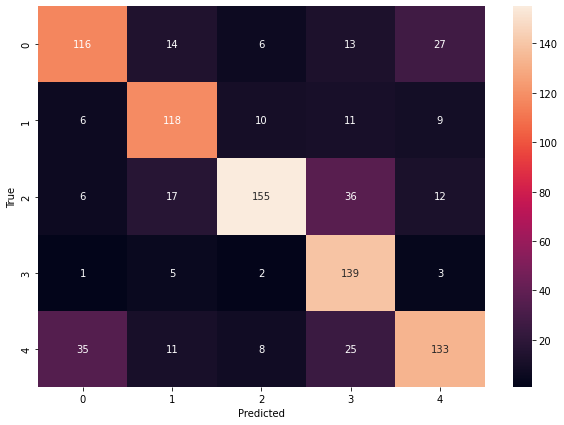

In [127]:
cm= tf.math.confusion_matrix(y_test,y_pred_classes)
import seaborn as sn
plt.figure (figsize =(10,7))
sn.heatmap(cm, annot = True,fmt = "d" )
plt.xlabel("Predicted")
plt.ylabel("True")

In [128]:
import sklearn
sklearn.metrics.confusion_matrix(y_test,y_pred_classes)

array([[116,  14,   6,  13,  27],
       [  6, 118,  10,  11,   9],
       [  6,  17, 155,  36,  12],
       [  1,   5,   2, 139,   3],
       [ 35,  11,   8,  25, 133]], dtype=int64)

__Conclusion : Accuracy increased from 66% to 72% after using Augmentation.
Also scores are improved. Con Matrix shows improvements.__